
<img src="classification.gif" style="width: 300px" align="center">

###   <font color=blue>***Autores:***</font> <font color=orange>Berenice Domínguez Sánchez, Jessica Huelgas Moreno, Carlos Rodrígo Pak López, Milton Jair González Ovando</font>   
###  <font color=blue>***Fecha de elaboración:***</font> <font color=orange>3/febrero/2021</font>
###  <font color=blue>***Fecha de última modificación:*** </font><font color=orange>9/febrero/2021</font>

<h1 align="center" style="background-color : #FFF5BA;">Tarea Final</h1> 

<font color='green'> 
## 1. Con los datos del COVID hacer una selección de variables:
&nbsp;

- Utilizar el AIC con fordward, backward y stepwise.
- Utilizar los criterios de BIC y Mallow CP.
- Si tuviese que eliminar doa variables, ¿cuáles serían y por qué? </font>

## Análisis previo 

Los métodos de selección permiten encontrar el mejor modelo a partir de las *k* variables explicativas que se tienen disponibles.

## Desarrollo 

Los métodos de selección permiten encontrar el mejor modelo a partir de las *k* variables explicativas que se tienen disponibles.

-**Regresión forward :** Inicia con un modelo sin variables explicativas y en cada paso agrega la variable explicativa más significativa. La mejor variable debe ser significatica con un valor *$\alpha$* de entrada del *10%* con la *$R^2$* más alta. Finalmente se realizan tantos pasos como sea posible hasta que ya no es posible agregar más variables significativas.

-**Regresión backward :** Inicia con un modelo que contiene todas las variables explicativas y en cada paso quita la variable explicativa menos significativa. Finalmente se realizan tantos pasos como sea posible hasta que ya no es posible eliminar más variables.

-**Regresión Stepwise :** Esta regresión en una combinación de las dos anteriores. Inicia con un modelo sin variables explicativas y en cada paso agrega una variable explicativa significativa. El forward se aplica cuando encuentra una variable no sigificativa.
[Referencia 1](https://essay.utwente.nl/76580/7/Master_Thesis_Perez_openbaar-12.pdf)

Al aplicar estos tres métodos de regresión, el resultado puede arrojar tres modelos diferentes

In [5]:
!pip install mlxtend

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [8]:
pwd

'C:\\Users\\jhuel\\Desktop\\DataBricks'

In [9]:
data = pd.read_csv("covid.csv")

In [10]:
data.head()

,Unnamed: 0,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,TIPO PACIENTE,EDAD
0,0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,51
1,1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,37
2,2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,18
3,3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,40
4,4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,HOSPITALIZADO,78


In [11]:
data.keys()

Index(['Unnamed: 0', 'SEXO', 'OBESIDAD', 'DIABETES', 'EPOC', 'ASMA',
       'CARDIOVASCULAR', 'RENAL CRONICA', 'INMUNOSUPRESION', 'HIPERTENSION',
       'TIPO PACIENTE', 'EDAD'],
      dtype='object')

In [12]:
print(data.describe)

<bound method NDFrame.describe of         Unnamed: 0    SEXO OBESIDAD DIABETES EPOC ASMA CARDIOVASCULAR  \
0                0   MUJER       NO       NO   NO   NO             NO   
1                1   MUJER       NO       NO   NO   NO             NO   
2                2  HOMBRE       NO       NO   NO   NO             NO   
3                3  HOMBRE       NO       NO   NO   NO             NO   
4                4   MUJER       NO       SI   NO   NO             NO   
5                5  HOMBRE       NO       NO   NO   NO             NO   
6                6   MUJER       NO       NO   NO   NO             NO   
7                7  HOMBRE       NO       NO   NO   NO             NO   
8                8   MUJER       NO       NO   NO   NO             NO   
9                9  HOMBRE       NO       NO   NO   NO             NO   
10              10  HOMBRE       NO       NO   NO   NO             NO   
11              11  HOMBRE       NO       NO   NO   NO             NO   
12              1

In [13]:
data.dtypes

Unnamed: 0          int64
SEXO               object
OBESIDAD           object
DIABETES           object
EPOC               object
ASMA               object
CARDIOVASCULAR     object
RENAL CRONICA      object
INMUNOSUPRESION    object
HIPERTENSION       object
TIPO PACIENTE      object
EDAD                int64
dtype: object

In [14]:
subdf = data[['SEXO', 'OBESIDAD', 'DIABETES', 'EPOC', 'ASMA',
       'CARDIOVASCULAR', 'RENAL CRONICA', 'INMUNOSUPRESION', 'HIPERTENSION',
       'TIPO PACIENTE', 'EDAD']]

In [15]:
subdf.head()

,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,TIPO PACIENTE,EDAD
0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,51
1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,37
2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,18
3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,40
4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,HOSPITALIZADO,78


In [16]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347502 entries, 0 to 347501
Data columns (total 11 columns):
SEXO               347502 non-null object
OBESIDAD           347502 non-null object
DIABETES           347502 non-null object
EPOC               347502 non-null object
ASMA               347502 non-null object
CARDIOVASCULAR     347502 non-null object
RENAL CRONICA      347502 non-null object
INMUNOSUPRESION    347502 non-null object
HIPERTENSION       347502 non-null object
TIPO PACIENTE      347502 non-null object
EDAD               347502 non-null int64
dtypes: int64(1), object(10)
memory usage: 29.2+ MB


In [17]:
subdf["SEXO"].value_counts()

HOMBRE    186233
MUJER     161269
Name: SEXO, dtype: int64

In [18]:
subdf["EDAD"].mean()

45.3304844288666

In [19]:
numerico = {"OBESIDAD": {"SI": 1, "NO": 0},
                "DIABETES": {"SI": 1, "NO": 0},
                "EPOC": {"SI": 1, "NO": 0},
                "ASMA": {"SI": 1, "NO": 0},
                "CARDIOVASCULAR": {"SI": 1, "NO": 0},
                "RENAL CRONICA": {"SI": 1, "NO": 0},
                "INMUNOSUPRESION": {"SI": 1, "NO": 0},
                "HIPERTENSION": {"SI": 1, "NO": 0},
                "TIPO PACIENTE": {"HOSPITALIZADO": 1, "AMBULATORIO": 0}}

In [20]:
cam = {"OBESIDAD": {"SI": 1, "NO": 0}}

In [21]:
subdf["OBESIDAD"] = subdf.OBESIDAD.astype('bool')

C:\Users\jhuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
bdata = pd.read_csv("covidbinario.csv")

In [23]:
bdata.dtypes

SEXO              object
OBE1DAD            int64
DIABETES           int64
EPOC               int64
ASMA               int64
CARDIOVASCULAR     int64
RENAL CRONICA      int64
INMUNOSUPRE1ON     int64
HIPERTEN1ON        int64
TIPO PACIENTE      int64
EDAD               int64
dtype: object

In [24]:
# Validación de NA's
for i in bdata.columns:
    nulos= pd.isnull(bdata[i]).sum()
    print('Columna {}: {}'.format(i, nulos))

Columna SEXO: 0
Columna OBE1DAD: 0
Columna DIABETES: 0
Columna EPOC: 0
Columna ASMA: 0
Columna CARDIOVASCULAR: 0
Columna RENAL CRONICA: 0
Columna INMUNOSUPRE1ON: 0
Columna HIPERTEN1ON: 0
Columna TIPO PACIENTE: 0
Columna EDAD: 0


In [101]:
X=bdata.iloc[:,1:8]
y=bdata.loc[:,"TIPO PACIENTE"]

In [102]:
model=LogisticRegression(C=100,solver='newton-cg',max_iter=10000).fit(X,y)
print(model.coef_[0])
print(model.intercept_)

[ 0.24869763  1.28468096  1.07970422 -0.38143144  0.66971703  1.11741467
  0.77930347]
[-1.28937873]


In [106]:
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [107]:
X0 = add_constant(X)
model0 = Logit(y,X0)
modelfit=model0.fit()
modelfit.summary()

Optimization terminated successfully.
         Current function value: 0.556064
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          TIPO PACIENTE   No. Observations:               347502
Model:                          Logit   Df Residuals:                   347494
Method:                           MLE   Df Model:                            7
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                 0.06711
Time:                        18:43:19   Log-Likelihood:            -1.9323e+05
converged:                       True   LL-Null:                   -2.0713e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2894      0.005   -263.272      0.000      -1.299      -1.280
OBE1DAD            0.2487      0.010     25.540      0.000       0.230       0.268
DIABETES           1.2847      0.010    130.990      0.000       1.265       1.304
EPOC               1.0797      0.029     36.629      0.000       1.022       1.137
ASMA              -0.3814      0.026    -14.541      0.000      -0.433      -0.330
CARDIOVASCULAR     0.6697      0.025     26.466      0.000       0.620       0.719
RENAL CRONICA      1.1174      0.027     41.437      0.000       1.065       1.170
INMUNOSUPRE1ON     0.7793      0.033     23.440      0.000       0.714       0.844
==================================================================================
"""

Al interpretar la columna d elos coeficientes, nos damos cuenta que 

In [109]:
hospitalizado=bdata[bdata['TIPO PACIENTE']==1]
ambulatorio=bdata[bdata['TIPO PACIENTE']==0]

In [111]:
import pylab as mp

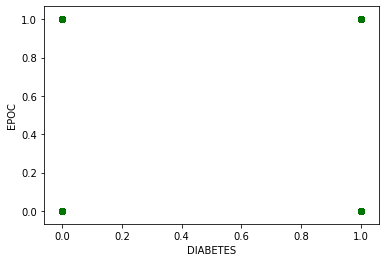

In [113]:
mp.xlabel('DIABETES')
mp.ylabel('EPOC')
mp.scatter(hospitalizado.DIABETES,hospitalizado.EPOC,color='red',label='',alpha=0.9,)
mp.scatter(ambulatorio.DIABETES,ambulatorio.EPOC,color='green',alpha=0.1)

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#from   sklearn.model_selection import GridSearchCV       #optimización de hiperparametros
#from   sklearn                 import metrics            #metricas de validación
from   sklearn.model_selection import train_test_split   #segmentación de muestra
from   sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from   sklearn.metrics         import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#from   sklearn.linear_model    import LogisticRegression #clasificador 
#from   sklearn.impute          import SimpleImputer      
#from   sklearn.compose         import ColumnTransformer
#from   sklearn.pipeline        import Pipeline
#from   sklearn.preprocessing   import LabelEncoder
#from   sklearn.preprocessing   import OneHotEncoder,StandardScaler
#from   sklearn.preprocessing   import KBinsDiscretizer
#from   sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score

In [100]:
#from sklearn.datasets   import load_wine
from sklearn.preprocessing import StandardScaler

In [92]:
bdata.keys()

Index(['SEXO', 'OBE1DAD', 'DIABETES', 'EPOC', 'ASMA', 'CARDIOVASCULAR',
       'RENAL CRONICA', 'INMUNOSUPRE1ON', 'HIPERTEN1ON', 'TIPO PACIENTE',
       'EDAD'],
      dtype='object')

In [118]:
X=bdata.iloc[:,1:8]
y=bdata.loc[:,"TIPO PACIENTE"]

In [119]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0)
X_train.shape,X_test.shape

((278001, 7), (69501, 7))

El objetivo es reducir el conjunto de caracteríaticas y quedarse con las mejores características.

### Forward Feature Selection (SFS)

In [120]:
sfs=SFS(RandomForestClassifier(n_estimators=100,n_jobs=-1),
       k_features= 4,
       forward=True,
       floating= False,
       verbose= 2,
       scoring='accuracy',
       cv= 4,
       n_jobs=-1
       ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   53.8s remaining:   40.3s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  1.2min finished

[2021-02-09 19:29:39] Features: 1/4 -- score: 0.7335081536531899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   29.1s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.2s finished

[2021-02-09 19:30:23] Features: 2/4 -- score: 0.7348534719597741[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.0s finished

[2021-02-09 19:31:07] Features: 3/4 -- score: 0.7357887194625532[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   40.2s finished

[2021-02-09 19:31:48] Features: 4/4 -- score: 0.736313

In [121]:

#Nos da los nombre de las características
#que mejor se ajustan al modelo
sfs.k_feature_names_

('DIABETES', 'EPOC', 'ASMA', 'RENAL CRONICA')

In [122]:
sfs.k_feature_idx_

(1, 2, 3, 5)

In [123]:
sfs.k_score_

0.7363138972484119

In [124]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.733508,0.000649543,"[0.7332844131739111, 0.7335107913669064, 0.733...","(1,)","(DIABETES,)",0.000405209,0.000233948
2,0.734853,0.000499301,"[0.7347951828031252, 0.7350503597122302, 0.734...","(1, 2)","(DIABETES, EPOC)",0.000311482,0.000179834
3,0.735789,0.000891351,"[0.7359894102243133, 0.7353669064748202, 0.735...","(1, 2, 5)","(DIABETES, EPOC, RENAL CRONICA)",0.000556058,0.00032104
4,0.736314,0.00142197,"[0.7365649415116329, 0.7353237410071942, 0.735...","(1, 2, 3, 5)","(DIABETES, EPOC, ASMA, RENAL CRONICA)",0.00088708,0.000512156


In [125]:
sfs1=SFS(RandomForestClassifier(n_estimators=100,n_jobs=-1),
       k_features= (1,5),
       forward=True,
       floating= False,
       verbose= 2,
       scoring='accuracy',
       cv= 4,
       n_jobs=-1
       ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   32.4s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   48.3s finished

[2021-02-09 19:46:51] Features: 1/5 -- score: 0.7335081536531899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   26.6s remaining:   26.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   39.8s finished

[2021-02-09 19:47:31] Features: 2/5 -- score: 0.7348534719597741[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.3s finished

[2021-02-09 19:48:14] Features: 3/5 -- score: 0.7357887194625532[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.4s finished

[2021-02-09 19:48:48] Features: 4/5 -- score: 0.736303

In [126]:
sfs1.k_score_

0.7363031058815054

# Las 4 características proncipales con las que nos quedamos son: 
'DIABETES', 'EPOC', 'ASMA', 'RENAL CRONICA'

In [127]:
sfs1.k_feature_names_

('DIABETES', 'EPOC', 'ASMA', 'RENAL CRONICA')

### STEP BACKWARD SELECTION (BSB)

In [128]:
sfs2=SFS(RandomForestClassifier(n_estimators=100,n_jobs=-1),
       k_features= (1,5),
       forward=False,
       floating= False,
       verbose= 2,
       scoring='accuracy',
       cv= 4,
       n_jobs=-1
       ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   48.4s remaining:   36.3s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  1.3min finished

[2021-02-09 19:56:08] Features: 6/1 -- score: 0.7362419548023686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   36.9s remaining:   36.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   55.9s finished

[2021-02-09 19:57:04] Features: 5/1 -- score: 0.7363031060367746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.4s finished

[2021-02-09 19:57:48] Features: 4/1 -- score: 0.736270731780786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   33.5s finished

[2021-02-09 19:58:22] Features: 3/1 -- score: 0.7357887

In [129]:
sfs2.k_score_

0.7363031060367746

In [130]:
sfs2.k_feature_names_

('DIABETES', 'EPOC', 'ASMA', 'RENAL CRONICA', 'INMUNOSUPRE1ON')

###  Exhaustive Feature Selection (EFS)

In [134]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [136]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features=2,
         max_features=5,
         scoring='accuracy',
         cv= None,
         n_jobs=-1).fit(X_train,y_train)

Features: 112/112

In [137]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [138]:
efs.best_score_

0.7363678547918893

In [139]:
efs.best_feature_names_

('DIABETES', 'EPOC', 'ASMA', 'RENAL CRONICA', 'INMUNOSUPRE1ON')

In [140]:
efs.best_idx_

(1, 2, 3, 5, 6)

In [141]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\jhuel\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\jhuel\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a784e78e10>)

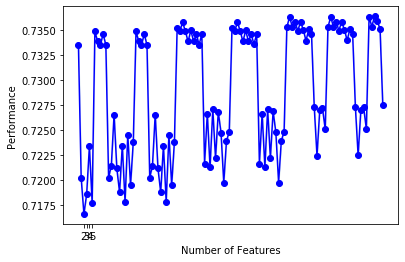

In [142]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')

Además, existen cuatro métricas importantes (AIC, AICc, BIC y Mallows Cp) que se utilizan comúnmente para la evaluación y selección de modelos. Se trata de una estimación no sesgada del error de predicción del modelo MSE. Cuanto más bajas sean estas métricas, mejor será el modelo.



In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between price and carat")
# reg1 is the model name , followed by equal sign. 
metricas = smf.ols(formula = 'DIABETES ~ EPOC', data=bdata).fit()
# print the result
print (metricas.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:               DIABETES   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2551.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:10:01   Log-Likelihood:            -1.4452e+05
No. Observations:              347502   AIC:                         2.890e+05
Df Residuals:                  347500   BIC:                         2.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

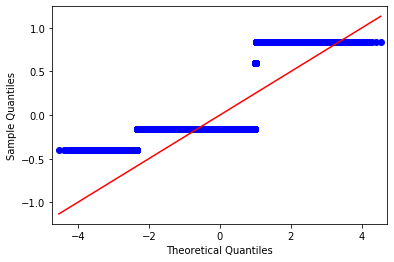

In [132]:
#Q-Q plot for normality
fig4=sm.qqplot(metricas.resid, line='r')

# SelectKBest

In [148]:
# Create feature and target variable for Classification problem
X_clf=bdata.iloc[:,1:5] # features: SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
y_clf=bdata.iloc[:,5] # Target variable: Iris species

In [150]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [151]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
X_clf_new=SelectKBest(score_func=chi2,k=2).fit_transform(X_clf,y_clf)

In [152]:
# Check the newly created variable for top two best features
print(X_clf_new[:5])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]


In [153]:
# Compare the newly created values with feature set values to know the selected features
print(X_clf.head())

   OBE1DAD  DIABETES  EPOC  ASMA
0        0         0     0     0
1        0         0     0     0
2        0         0     0     0
3        0         0     0     0
4        0         1     0     0


# OneHotEncoder

OneHotEncoder de la biblioteca SciKit solo toma valores categóricos numéricos, por lo tanto, cualquier valor del tipo de cadena debe codificarse en una etiqueta antes que uno en caliente. 

In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [158]:
ohe = OneHotEncoder(sparse = False)
le = LabelEncoder()
ohe.fit_transform(le.fit_transform(y_clf).reshape(-1, 1))

C:\Users\jhuel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

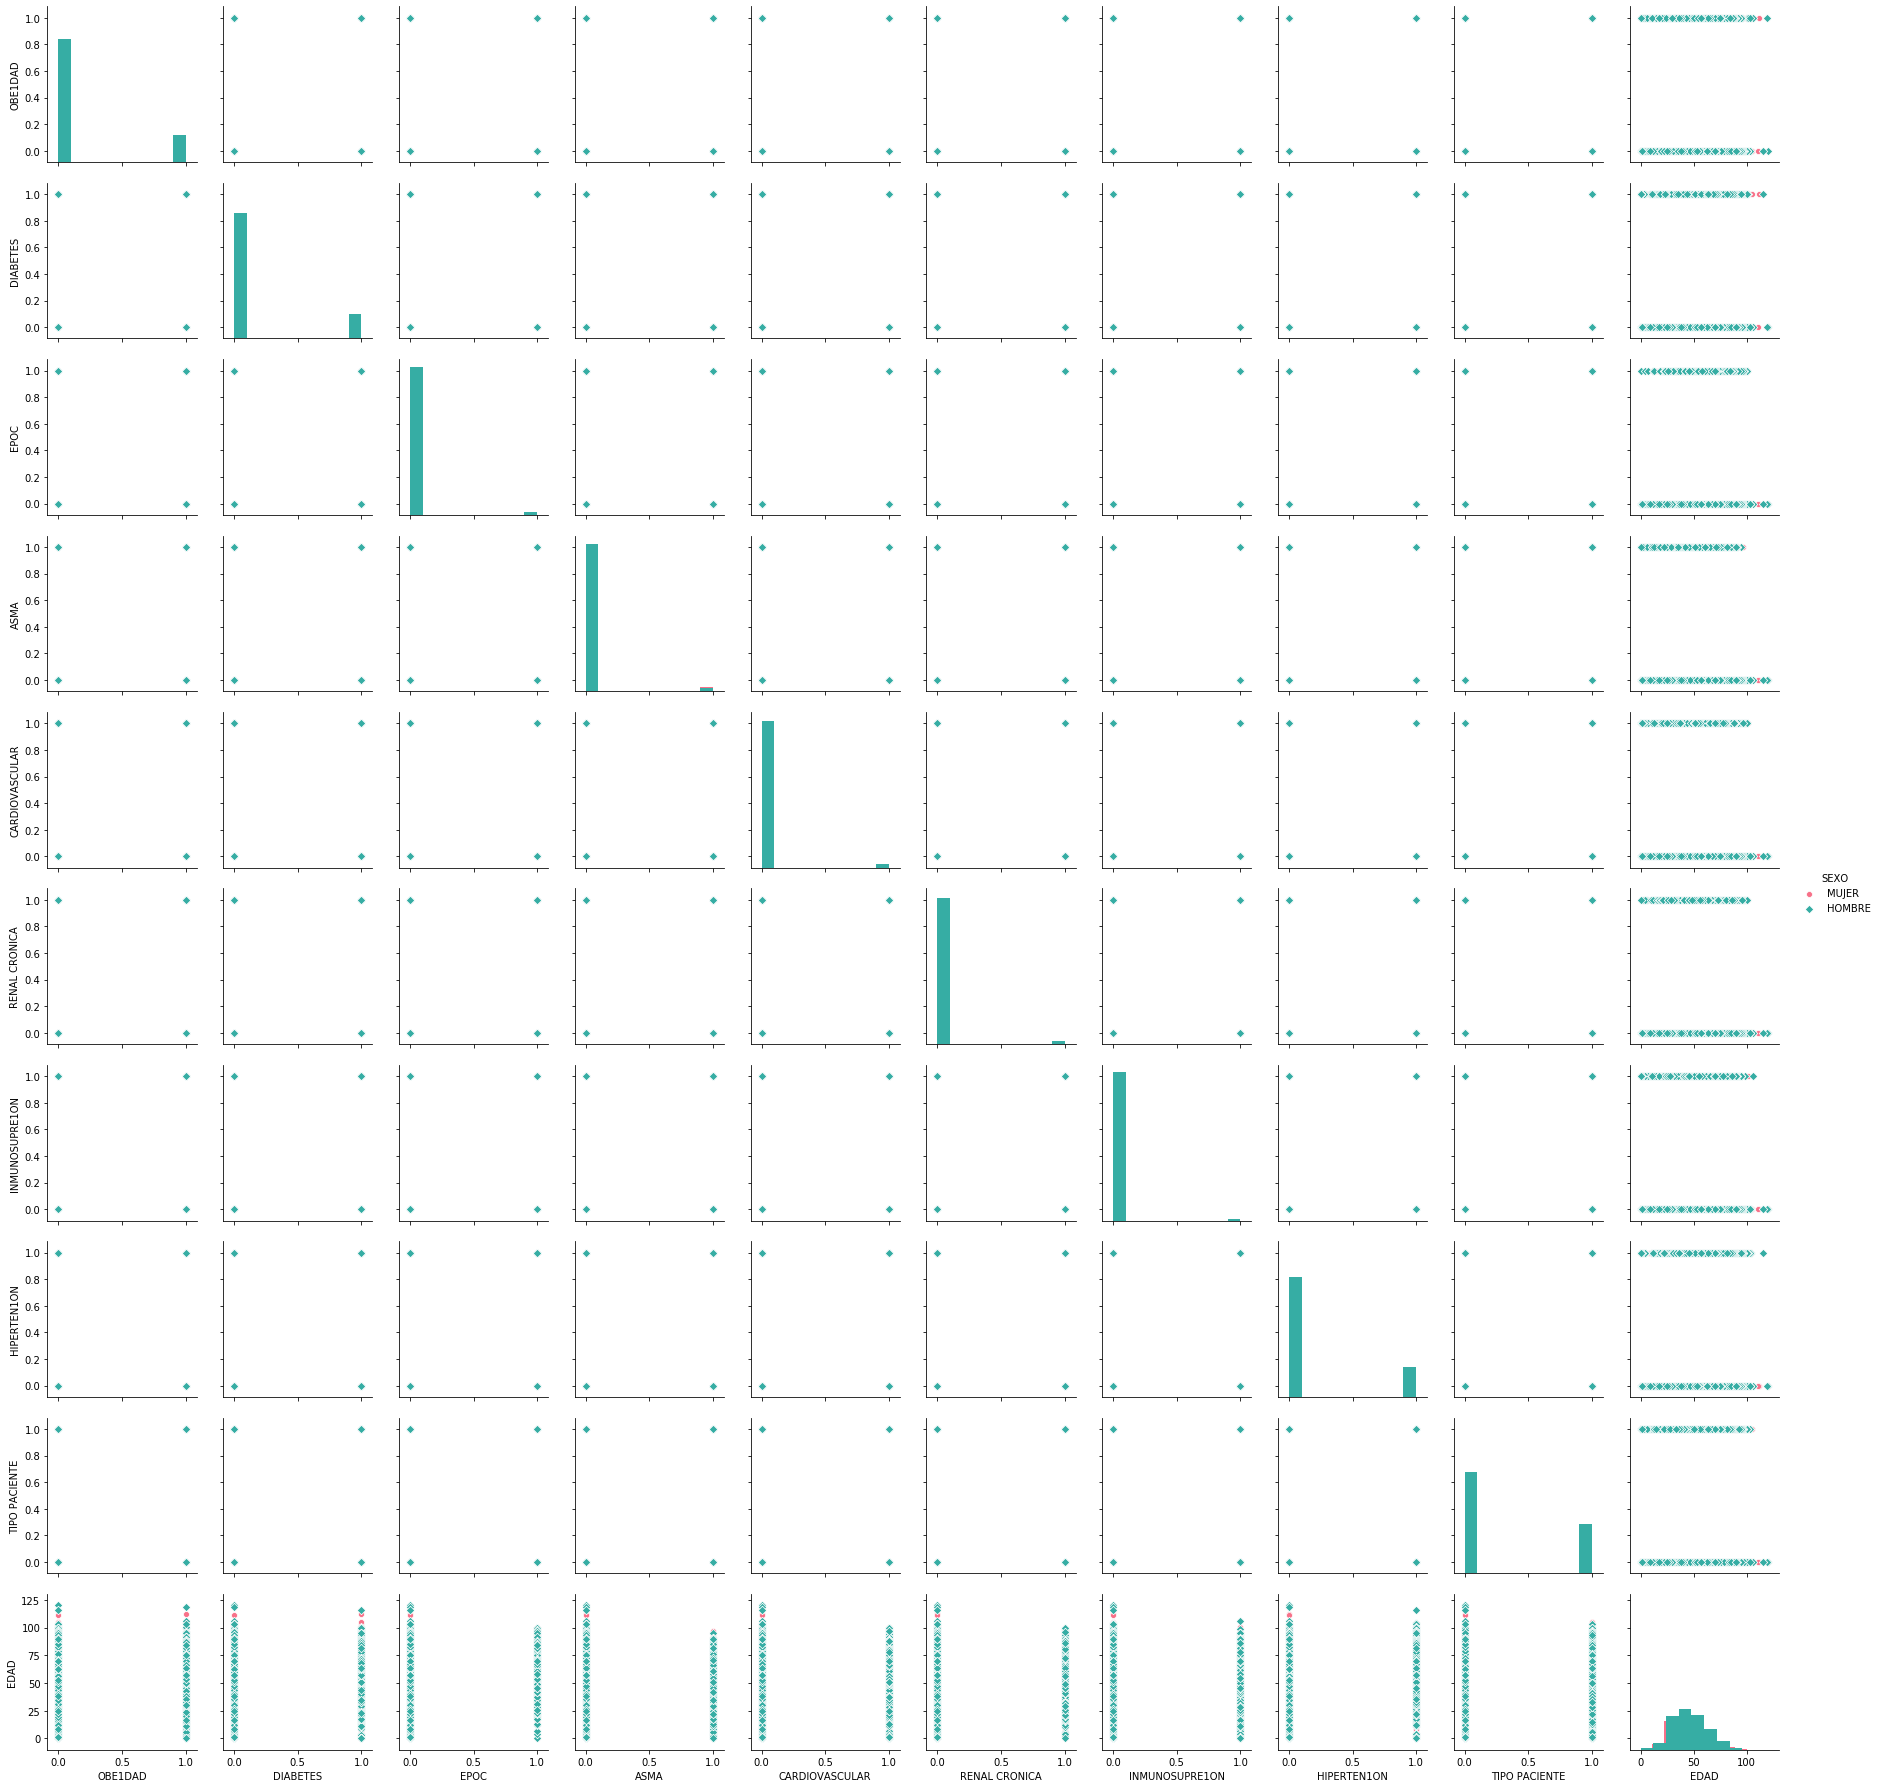

In [26]:
import matplotlib.pyplot as plt  # Librería de gráficos de python
import seaborn as sns            # Librería de gráficos (complemento)

#sns.pairplot(auto[var_num], height=3, diag_kind= 'hist', kind='scatter', 
#             markers='P')

sns.pairplot(bdata, diag_kind= 'hist', kind='scatter', 
             markers=["o", "D"], hue = 'SEXO', palette= 'husl')
plt.show()

In [27]:
print(bdata['SEXO'].value_counts())

HOMBRE    186233
MUJER     161269
Name: SEXO, dtype: int64


`Esto es una línea de código`

In [42]:
#bibliotecas necesarias para el funcionamiento
import pandas                  as pd                     #manejo y manipulación de dataframes
import scipy
import numpy                   as np                     #soporte matricial y vectorial
import matplotlib.pyplot       as plt                    #graficos
import joblib
from   sklearn.model_selection import GridSearchCV       #optimización de hiperparametros
from   sklearn                 import metrics            #metricas de validación
from   sklearn.model_selection import train_test_split   #segmentación de muestra
from   sklearn.linear_model    import LogisticRegression #clasificador 
from   sklearn.impute          import SimpleImputer      
from   sklearn.compose         import ColumnTransformer
from   sklearn.pipeline        import Pipeline
from   sklearn.preprocessing   import LabelEncoder
from   sklearn.preprocessing   import OneHotEncoder,StandardScaler
from   sklearn.preprocessing   import KBinsDiscretizer
from   sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score

In [43]:
pwd

'C:\\Users\\jhuel\\Desktop\\DataBricks'

In [44]:
data = pd.read_csv("covid.csv")

In [45]:
data["TIPO PACIENTE"].value_counts()

AMBULATORIO      249047
HOSPITALIZADO     98455
Name: TIPO PACIENTE, dtype: int64

In [47]:
y=LabelEncoder().fit_transform(data["TIPO PACIENTE"])
X=data.drop(["TIPO PACIENTE"],axis=1)
X.head(5)

,Unnamed: 0,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,EDAD
0,0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,51
1,1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,37
2,2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,18
3,3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,40
4,4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,78


In [95]:
#crea un pipeline para generar el modelo
def modelo(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'))])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    #el pipeline con el procesamiento y el claificador
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', gridsearh())])
    modelo=clf.fit(X_train, y_train)
    return modelo

In [49]:
#El grid search prueba con varios modelos usando holdout 70-30
def gridsearh():
    clf = LogisticRegression(fit_intercept=True,solver='lbfgs',tol=1e-5,max_iter=75,n_jobs=8)
    grid_values = {'penalty': [ 'l2'],'C':np.logspace(-5, 5, 100)}
    """se evalúan todas las combinaciones posibles de valores de parámetros y 
    se conserva la mejor combinacion."""   
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    return grid_clf_acc

In [50]:
#El score obtenido con el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
categorical_features = ['SEXO','OBESIDAD','DIABETES','EPOC','ASMA','CARDIOVASCULAR','RENAL CRONICA',"INMUNOSUPRESION","HIPERTENSION"]
numeric_features=['EDAD']
modelo=modelo(X_train, y_train,numeric_features,categorical_features)
print("model score: %.3f" % modelo.score(X_test, y_test))

C:\Users\jhuel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


model score: 0.763


In [55]:
#se guarda el modelo serializado
joblib.dump(modelo,"modelos/logistic_modelV3.pkl")

['modelos/logistic_modelV3.pkl']

In [114]:
sklearn.datasets.get_data_home(data_home=None)

NameError: name 'sklearn' is not defined

In [57]:
#Se imprimen los coeficientes asociados a los estimadores
print(modelo.named_steps['classifier'].best_estimator_.coef_)
print(modelo.named_steps['classifier'].best_estimator_.intercept_)

[[ 0.60338349  0.15918152 -0.33967807 -0.20790939  0.02741284 -0.3996552
   0.21915865 -0.32848019  0.14798364  0.01943898 -0.19993553 -0.17695273
  -0.00354382 -0.56395803  0.38346148 -0.47738373  0.29688717 -0.22925057
   0.04875401]]
[-0.18445755]


In [59]:
print(modelo.named_steps['classifier'].best_estimator_)

LogisticRegression(C=0.13848863713938717, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=75, multi_class='warn', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [60]:
#la matriz de confusion
predict=modelo.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict)
print(cm)

[[66616  7996]
 [16714 12925]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     74612
           1       0.62      0.44      0.51     29639

    accuracy                           0.76    104251
   macro avg       0.71      0.66      0.68    104251
weighted avg       0.75      0.76      0.75    104251



In [64]:
!pip install --upgrade sklearn

  Stored in directory: C:\Users\jhuel\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


NameError: name 'score' is not defined

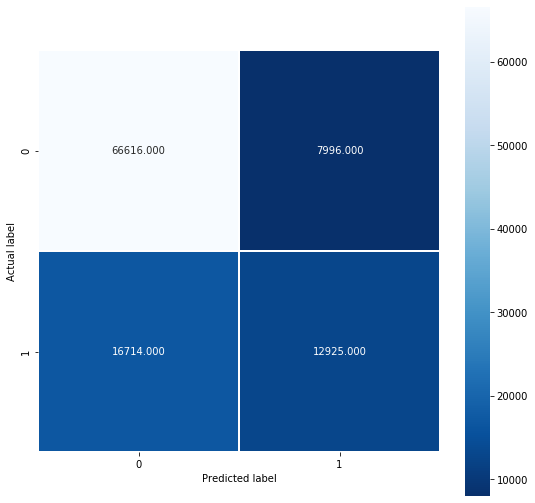

In [159]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [65]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\jhuel\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [80]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [82]:
#la matriz de confusion en scikit learn normalizada
from sklearn import *
#disp=metrics.plot_confusion_matrix(modelo, X_test, y_test,normalize="pred",display_labels=np.array(["NO","SI"]))
disp=plot_confusion_matrix(modelo, X_test, y_test,normalize="pred",display_labels=np.array(["NO","SI"]))
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

TypeError: plot_confusion_matrix() got multiple values for argument 'title'

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 1098,  1934,   807],
                                              [  604,  4392,  6233],
                                              [  162,  2362, 31760]]), 
                      normalize    = False,
                      target_names = ['high', 'medium', 'low'],
                      title        = "Confusion Matrix")

In [66]:
#calculo de las probabilidades y el AUC
probs = modelo.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [67]:
predictions=modelo.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7629758947156382
Precision score:  0.6178002963529468
Recall score:  0.43608083943452886
F1 score:  0.5112737341772152


(array([18729., 10846., 16178.,  3086., 11947.,  3758.,  1980., 10034.,
         3427.,  3031.,  6929.,  2103.,  4288.,  3056.,   617.,  2284.,
          916.,   532.,   327.,   152.,    31.]),
 array([0.04279235, 0.08701504, 0.13123773, 0.17546041, 0.2196831 ,
        0.26390579, 0.30812848, 0.35235117, 0.39657385, 0.44079654,
        0.48501923, 0.52924192, 0.57346461, 0.61768729, 0.66190998,
        0.70613267, 0.75035536, 0.79457805, 0.83880073, 0.88302342,
        0.92724611, 0.9714688 ]),
 <a list of 21 Patch objects>)

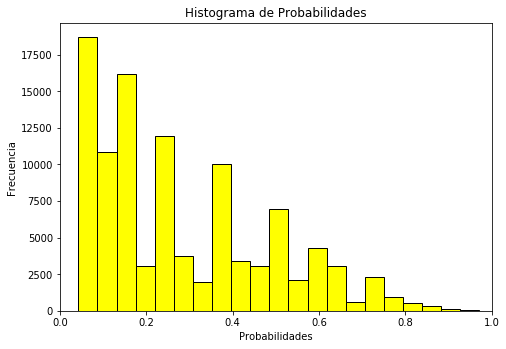

In [72]:
fig=plt.figure()
axes=fig.add_axes([1,1,1.0,1.0])
axes.set_title("Histograma de Probabilidades")
axes.set_xlim(0,1)
axes.set_xlabel("Probabilidades")
axes.set_ylabel("Frecuencia")
axes.hist(preds,bins=21,color="yellow",edgecolor="black")

(0, 1)

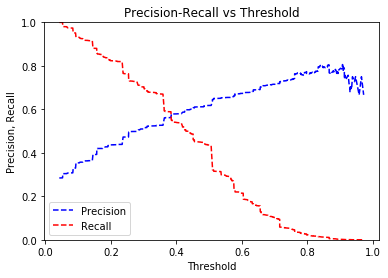

In [73]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1]) 
pr_auc = metrics.auc(recall, precision)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

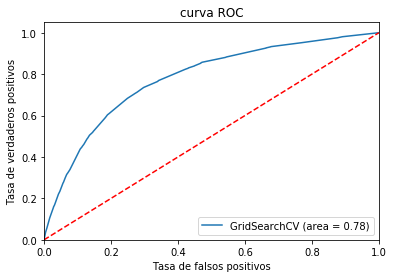

In [74]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

La curva de característica operativa del receptor (ROC) es otra herramienta común utilizada con clasificadores binarios. La línea de puntos representa la curva ROC de un clasificador puramente aleatorio; un buen clasificador permanece lo más lejos posible de esa línea (hacia la esquina superior izquierda).